[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mettinger/activeInference/blob/main/julia/hiddenMarkovModel.ipynb)

## This example notebook was taken from the RxInfer.jl repository and modified.

### Julia installation cell for COLAB ONLY!!!!!  Do not run the next cell if you are running locally instead of on Colab.

In [ ]:
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

After you run the first cell (the the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.7* in Runtime type. Now click on SAVE and you are ready to go.

### Package installation cell for COLAB ONLY!!!!!  Do not run the next cell if you are running locally instead of on Colab.

In [7]:
using Pkg
Pkg.add(["RxInfer", "Random", "Plots"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


### Coin flip example starts here:

In [1]:
using RxInfer, Random, Plots

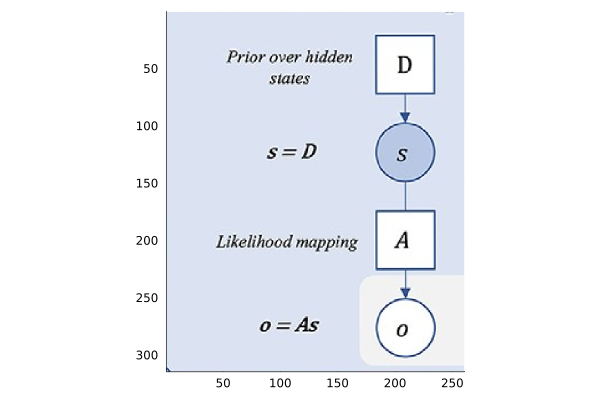

In [10]:
using Images
img = load("../images/perception.png")
plot(img, seriestype = :image)

In [2]:
rng = MersenneTwister(42)
n = 500
θ_real = 0.75
distribution = Bernoulli(θ_real)

dataset = float.(rand(rng, Bernoulli(θ_real), n));

In [3]:
@model function coin_model(n)

    y = datavar(Float64, n)

    θ ~ Uniform(0.0, 1.0)

    for i in 1:n
        y[i] ~ Bernoulli(θ)
    end

end

In [4]:
result = inference(
    model = coin_model(length(dataset)), 
    data  = (y = dataset, )
)

Inference results:
  Posteriors       | available for (θ)


In [5]:
θestimated = result.posteriors[:θ]

Beta{Float64}(α=362.0, β=140.0)

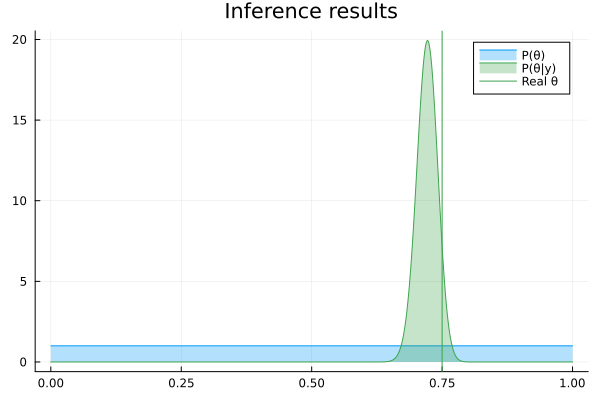

In [6]:
using Plots

rθ = range(0, 1, length = 1000)

p = plot(title = "Inference results")

plot!(rθ, (x) -> pdf(Uniform(0.0, 1.0), x), fillalpha=0.3, fillrange = 0, label="P(θ)", c=1,)
plot!(rθ, (x) -> pdf(θestimated, x), fillalpha=0.3, fillrange = 0, label="P(θ|y)", c=3)
vline!([θ_real], label="Real θ")